# Country and jurisdictions borders

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline 
# The shapely.ops module has a cascaded_union that finds the cumulative union of many objects
from shapely.ops import cascaded_union

Read tables

In [2]:
Map0 = gpd.read_file('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/gadm36_levels_shp/gadm36_0.shp')
Map1 = gpd.read_file('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/gadm36_levels_shp/gadm36_1.shp')

### Country borders

In [3]:
iso = ['BGD','IND','KEN','LSO','NGA','TZA','UGA']

In [4]:
Map0.rename(columns={'GID_0': 'iso', 'NAME_0':'country'}, inplace=True)

In [9]:
df = pd.DataFrame(columns=['geometry','country','iso'])
for i in iso:
    country = Map0[Map0['iso'] == i]
    country = country[['geometry','country','iso']]
    df = gpd.GeoDataFrame(pd.concat([df,country]))
    
df.reset_index(drop=True, inplace=True)

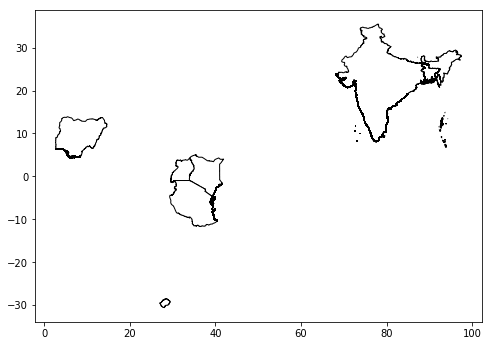

In [10]:
fig, ax = plt.subplots(figsize=[8,8])
ax.set_aspect('equal')

df.plot(ax=ax, color='white', edgecolor='black')

Save table 

In [11]:
df.to_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/FSP_Maps/country_borders_gadm36.csv')

### Country jurisdictios (Admin 1)

In [15]:
iso = ['BGD','IND','KEN','LSO','NGA','TZA','UGA']

In [16]:
df = pd.DataFrame(columns=['geometry', 'iso','country','code','jurisdiction'])
for country in iso:
    if country == 'IND':
        jurisdiction = Map1[(Map1['NAME_1'] == 'Uttar Pradesh') | (Map1['NAME_1'] == 'Bihar')]
        jurisdiction = jurisdiction[['geometry', 'GID_0','NAME_0','GID_1','NAME_1']]
        jurisdiction.rename(columns={'GID_0':'iso', 'NAME_0':'country', 'GID_1':'code', 'NAME_1':'jurisdiction'}, inplace= True)
        df = pd.concat([df,jurisdiction])
    else:
        jurisdiction = Map1[Map1['GID_0'] == country]
        jurisdiction = jurisdiction[['geometry', 'GID_0','NAME_0','GID_1','NAME_1']]
        jurisdiction.rename(columns={'GID_0':'iso', 'NAME_0':'country', 'GID_1':'code', 'NAME_1':'jurisdiction'}, inplace= True)
        df = pd.concat([df,jurisdiction])
    
df.reset_index(drop=True, inplace=True)

Save table

In [ ]:
df.to_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/FSP_Maps/jurisdictions.csv')